In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import folium
import geopandas as gpd

In [50]:
pip install geopandas matplotlib

     ---------------------------------------- 1.1/1.1 MB 625.7 kB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 439.0 kB/s eta 0:00:00
     -------------------------------------- 22.7/22.7 MB 390.5 kB/s eta 0:00:00
     ---------------------------------------- 5.8/5.8 MB 307.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


#### Read CSV Files

In [3]:
fastfood = pd.read_csv('C:Datafiniti_Fast_Food_Restaurants.csv')
fastfood.head()

,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
1,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,Fast Food Restaurants,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
2,AVwcopQoByjofQCxgfVa,2016-03-29T05:06:36Z,2018-06-26T02:59:52Z,206 Wears Valley Rd,Fast Food Restaurant,Pigeon Forge,US,us/tn/pigeonforge/206wearsvalleyrd/-864103396,35.803788,-83.580553,Taco Bell,37863,TN,https://www.yellowpages.com/pigeon-forge-tn/mi...,"http://www.tacobell.com,https://locations.taco..."
3,AVweXN5RByjofQCxxilK,2017-01-03T07:46:11Z,2018-06-26T02:59:51Z,3652 Parkway,Fast Food,Pigeon Forge,US,us/tn/pigeonforge/3652parkway/93075755,35.782339,-83.551408,Arby's,37863,TN,http://www.yellowbook.com/profile/arbys_163389...,"http://www.arbys.com,https://locations.arbys.c..."
4,AWQ6MUvo3-Khe5l_j3SG,2018-06-26T02:59:43Z,2018-06-26T02:59:43Z,2118 Mt Zion Parkway,Fast Food Restaurant,Morrow,US,us/ga/morrow/2118mtzionparkway/1305117222,33.562738,-84.321143,Steak 'n Shake,30260,GA,https://foursquare.com/v/steak-n-shake/4bcf77a...,http://www.steaknshake.com/locations/23851-ste...


In [4]:
#drop dateAdded column

fastfood.drop('dateAdded', axis =1, inplace = True)


In [5]:
fastfood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10000 non-null  object 
 1   dateUpdated  10000 non-null  object 
 2   address      10000 non-null  object 
 3   categories   10000 non-null  object 
 4   city         10000 non-null  object 
 5   country      10000 non-null  object 
 6   keys         10000 non-null  object 
 7   latitude     10000 non-null  float64
 8   longitude    10000 non-null  float64
 9   name         10000 non-null  object 
 10  postalCode   10000 non-null  object 
 11  province     10000 non-null  object 
 12  sourceURLs   10000 non-null  object 
 13  websites     10000 non-null  object 
dtypes: float64(2), object(12)
memory usage: 1.1+ MB


In [6]:
#split date and time column

# Convert the 'datetime_column' to a pandas datetime object
fastfood['dateUpdated'] = pd.to_datetime(fastfood['dateUpdated'])

# Create separate 'date' and 'time' columns
fastfood['date'] = fastfood['dateUpdated'].dt.date
fastfood['time'] = fastfood['dateUpdated'].dt.time

fastfood.drop(columns=['dateUpdated'], inplace=True)

fastfood.head()

,id,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites,date,time
0,AVwcmSyZIN2L1WUfmxyw,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...,2018-06-26,03:00:14
1,AVwcmSyZIN2L1WUfmxyw,800 N Canal Blvd,Fast Food Restaurants,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...,2018-06-26,03:00:14
2,AVwcopQoByjofQCxgfVa,206 Wears Valley Rd,Fast Food Restaurant,Pigeon Forge,US,us/tn/pigeonforge/206wearsvalleyrd/-864103396,35.803788,-83.580553,Taco Bell,37863,TN,https://www.yellowpages.com/pigeon-forge-tn/mi...,"http://www.tacobell.com,https://locations.taco...",2018-06-26,02:59:52
3,AVweXN5RByjofQCxxilK,3652 Parkway,Fast Food,Pigeon Forge,US,us/tn/pigeonforge/3652parkway/93075755,35.782339,-83.551408,Arby's,37863,TN,http://www.yellowbook.com/profile/arbys_163389...,"http://www.arbys.com,https://locations.arbys.c...",2018-06-26,02:59:51
4,AWQ6MUvo3-Khe5l_j3SG,2118 Mt Zion Parkway,Fast Food Restaurant,Morrow,US,us/ga/morrow/2118mtzionparkway/1305117222,33.562738,-84.321143,Steak 'n Shake,30260,GA,https://foursquare.com/v/steak-n-shake/4bcf77a...,http://www.steaknshake.com/locations/23851-ste...,2018-06-26,02:59:43


In [8]:
fastfood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          10000 non-null  object 
 1   address     10000 non-null  object 
 2   categories  10000 non-null  object 
 3   city        10000 non-null  object 
 4   country     10000 non-null  object 
 5   keys        10000 non-null  object 
 6   latitude    10000 non-null  float64
 7   longitude   10000 non-null  float64
 8   name        10000 non-null  object 
 9   postalCode  10000 non-null  object 
 10  province    10000 non-null  object 
 11  sourceURLs  10000 non-null  object 
 12  websites    10000 non-null  object 
 13  date        10000 non-null  object 
 14  time        10000 non-null  object 
dtypes: float64(2), object(13)
memory usage: 1.1+ MB


In [7]:
#convert the date column to standard date-time format

fastfood['date'] = pd.to_datetime(fastfood['date'])
#extract the month and create a new column for it
fastfood['month'] = fastfood['date'].dt.month

fastfood.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          10000 non-null  object        
 1   address     10000 non-null  object        
 2   categories  10000 non-null  object        
 3   city        10000 non-null  object        
 4   country     10000 non-null  object        
 5   keys        10000 non-null  object        
 6   latitude    10000 non-null  float64       
 7   longitude   10000 non-null  float64       
 8   name        10000 non-null  object        
 9   postalCode  10000 non-null  object        
 10  province    10000 non-null  object        
 11  sourceURLs  10000 non-null  object        
 12  websites    10000 non-null  object        
 13  date        10000 non-null  datetime64[ns]
 14  time        10000 non-null  object        
 15  month       10000 non-null  int64         
dtypes: datetime64[ns](1), f

In [8]:
#convert month number to month name

# Map the month number to month name
fastfood['months_name'] = fastfood['month'].apply(lambda x: calendar.month_name[x])

In [9]:
fastfood.head()

,id,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites,date,time,month,months_name
0,AVwcmSyZIN2L1WUfmxyw,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...,2018-06-26,03:00:14,6,June
1,AVwcmSyZIN2L1WUfmxyw,800 N Canal Blvd,Fast Food Restaurants,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...,2018-06-26,03:00:14,6,June
2,AVwcopQoByjofQCxgfVa,206 Wears Valley Rd,Fast Food Restaurant,Pigeon Forge,US,us/tn/pigeonforge/206wearsvalleyrd/-864103396,35.803788,-83.580553,Taco Bell,37863,TN,https://www.yellowpages.com/pigeon-forge-tn/mi...,"http://www.tacobell.com,https://locations.taco...",2018-06-26,02:59:52,6,June
3,AVweXN5RByjofQCxxilK,3652 Parkway,Fast Food,Pigeon Forge,US,us/tn/pigeonforge/3652parkway/93075755,35.782339,-83.551408,Arby's,37863,TN,http://www.yellowbook.com/profile/arbys_163389...,"http://www.arbys.com,https://locations.arbys.c...",2018-06-26,02:59:51,6,June
4,AWQ6MUvo3-Khe5l_j3SG,2118 Mt Zion Parkway,Fast Food Restaurant,Morrow,US,us/ga/morrow/2118mtzionparkway/1305117222,33.562738,-84.321143,Steak 'n Shake,30260,GA,https://foursquare.com/v/steak-n-shake/4bcf77a...,http://www.steaknshake.com/locations/23851-ste...,2018-06-26,02:59:43,6,June


In [10]:
#drop month column

fastfood.drop('month', axis =1, inplace = True)


In [11]:
fastfood.head()

,id,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites,date,time,months_name
0,AVwcmSyZIN2L1WUfmxyw,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...,2018-06-26,03:00:14,June
1,AVwcmSyZIN2L1WUfmxyw,800 N Canal Blvd,Fast Food Restaurants,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...,2018-06-26,03:00:14,June
2,AVwcopQoByjofQCxgfVa,206 Wears Valley Rd,Fast Food Restaurant,Pigeon Forge,US,us/tn/pigeonforge/206wearsvalleyrd/-864103396,35.803788,-83.580553,Taco Bell,37863,TN,https://www.yellowpages.com/pigeon-forge-tn/mi...,"http://www.tacobell.com,https://locations.taco...",2018-06-26,02:59:52,June
3,AVweXN5RByjofQCxxilK,3652 Parkway,Fast Food,Pigeon Forge,US,us/tn/pigeonforge/3652parkway/93075755,35.782339,-83.551408,Arby's,37863,TN,http://www.yellowbook.com/profile/arbys_163389...,"http://www.arbys.com,https://locations.arbys.c...",2018-06-26,02:59:51,June
4,AWQ6MUvo3-Khe5l_j3SG,2118 Mt Zion Parkway,Fast Food Restaurant,Morrow,US,us/ga/morrow/2118mtzionparkway/1305117222,33.562738,-84.321143,Steak 'n Shake,30260,GA,https://foursquare.com/v/steak-n-shake/4bcf77a...,http://www.steaknshake.com/locations/23851-ste...,2018-06-26,02:59:43,June


#### Analyzing the data

#### Analyze the distribution of restaurants per location

In [12]:
# Create a map centered on the United States

map_center = [37.0902, -95.7129]
restaurant_map = folium.Map(location=map_center, zoom_start=4)

# Function to add markers for each restaurant
def add_marker(row):
    popup_text = f"Name: {row['name']}<br>Category: {row['categories']}"
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=popup_text,
        icon=folium.Icon(color='blue')
    ).add_to(restaurant_map)

# Add markers for each restaurant in the dataframe
fastfood.apply(add_marker, axis=1)

# Save the map to an HTML file (you can view it in your browser)
restaurant_map.save("restaurant_distribution_map.html")


In [13]:
#### Analyze the number of restaurant per capital

# Group by City and Count Restaurants
restaurant_count_by_city = fastfood.groupby('city').size().reset_index(name='Number of Restaurants')
restaurant_count_by_city

,city,Number of Restaurants
0,Aberdeen,6
1,Abilene,6
2,Abingdon,3
3,Abington,1
4,Acton,2
...,...,...
2759,Zachary,1
2760,Zanesville,4
2761,Zebulon,1
2762,Zeeland,1


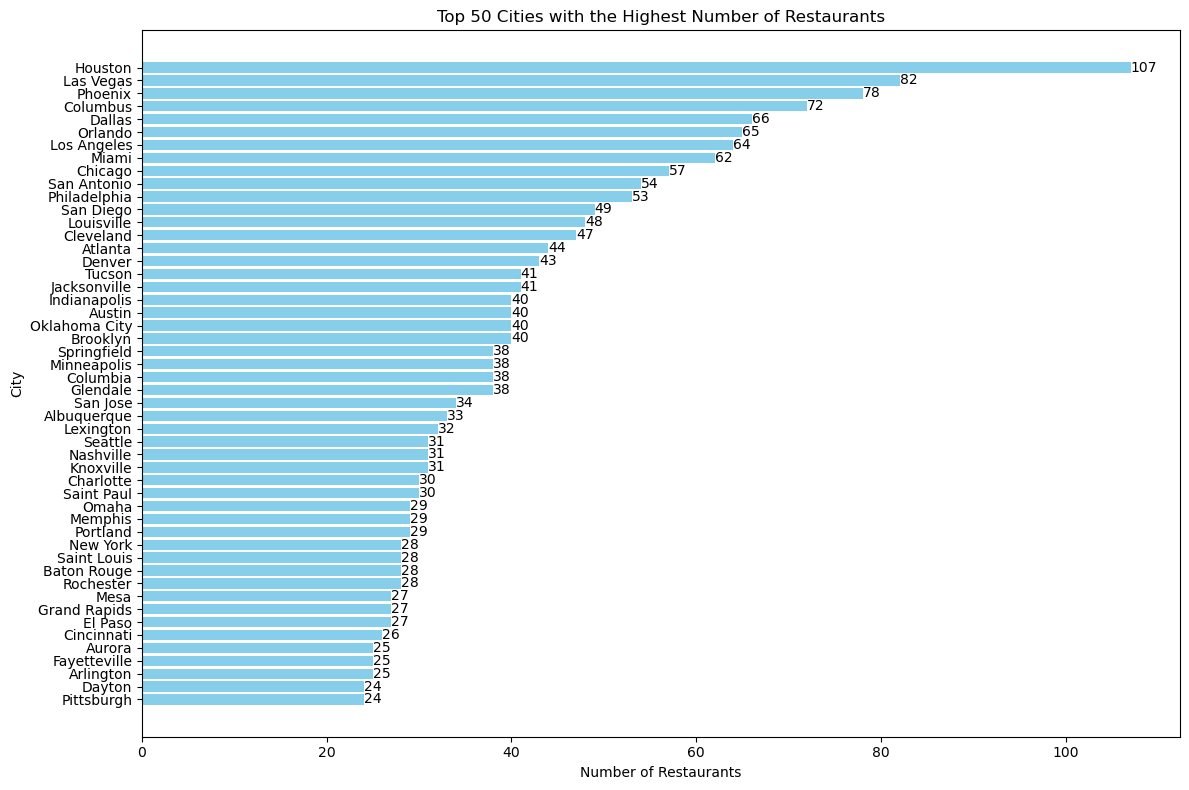

In [15]:
#Find Top 20 cities with highest number of restaurant

# Group by City and Count Restaurants
restaurant_count_by_city = fastfood.groupby('city').size().reset_index(name='Number of Restaurants')

# Sort cities by the number of restaurants in descending order
restaurant_count_by_city = restaurant_count_by_city.sort_values(by='Number of Restaurants', ascending=False)

# Select the top N cities with the highest restaurant counts
top_n = 50
top_cities = restaurant_count_by_city.head(top_n)

# Create the bar chart
plt.figure(figsize=(12, 8))
bars = plt.barh(top_cities['city'], top_cities['Number of Restaurants'], color='skyblue')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.title(f'Top {top_n} Cities with the Highest Number of Restaurants')
plt.gca().invert_yaxis()  # Invert y-axis to display cities from top to bottom

# Add value labels on each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, str(int(width)), ha='left', va='center', fontsize=10)


plt.tight_layout()
plt.show()



#### From the above result. It is clear that top 10 cities with the highest number of restaurant are - Houston, Las Vegas, Phoenix, Columbus, Dallas, Orlando, Los Angeles, Miami, Chicago, San Antonio

#### Find Province with the highest number of Restaurants

In [14]:
#Find the province the highest number of restaurant
# Group by Province and Count Restaurants
restaurant_count_by_province = fastfood.groupby('province').size().reset_index(name='Number of Restaurants')
restaurant_count_by_province


,province,Number of Restaurants
0,AK,16
1,AL,6
2,AR,102
3,AZ,330
4,CA,1201
5,CO,148
6,CT,53
7,DE,44
8,FL,621
9,GA,420


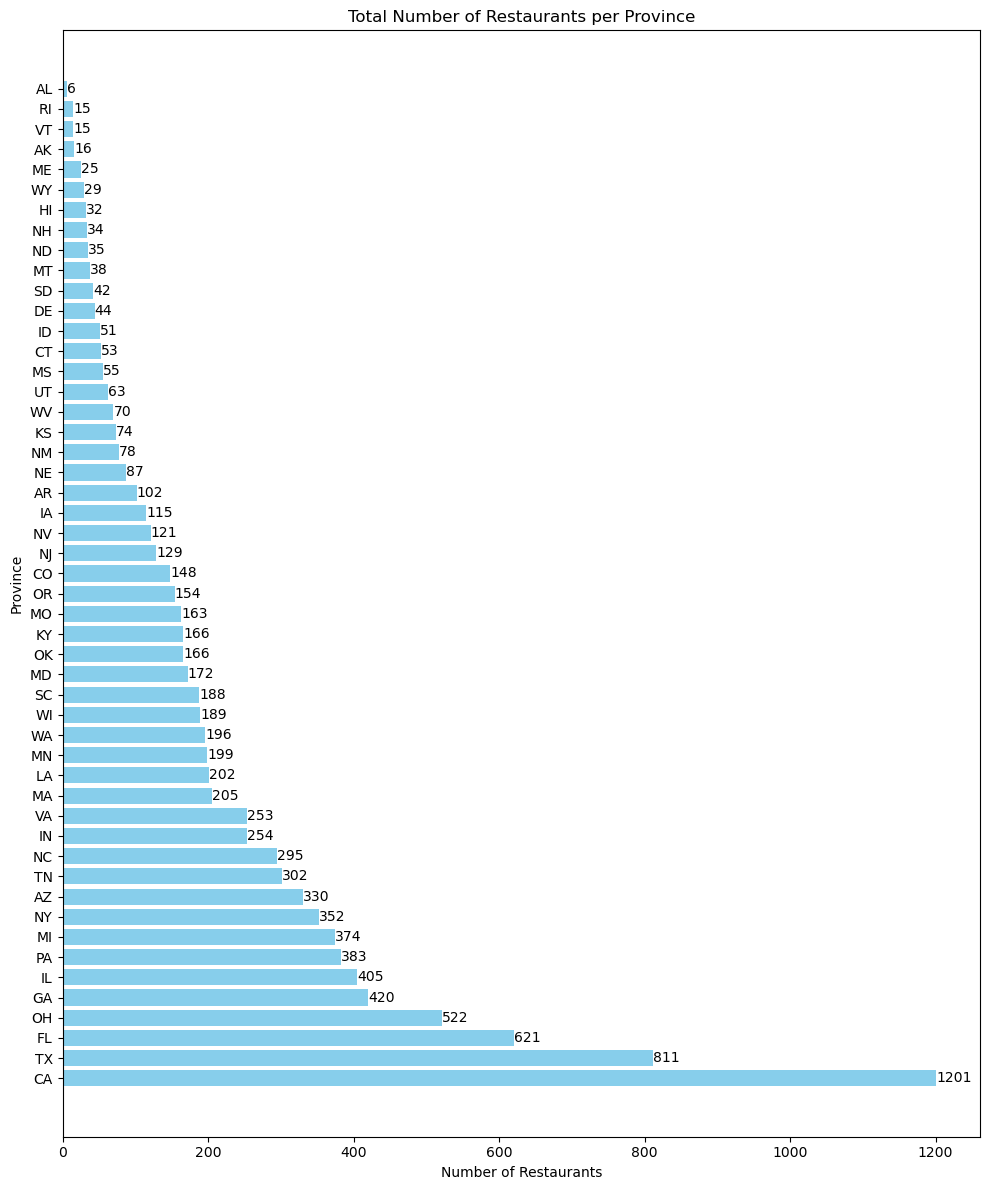

In [15]:
#Visualize the number of restaurant per each province in the US

# Group by Province and Count Restaurants
restaurant_count_by_province = fastfood.groupby('province').size().reset_index(name='Number of Restaurants')

# Sort the provinces by the number of restaurants in descending order
restaurant_count_by_province = restaurant_count_by_province.sort_values(by='Number of Restaurants', ascending=False)

# Create the horizontal bar chart
plt.figure(figsize=(10, 12))
plt.barh(restaurant_count_by_province['province'], restaurant_count_by_province['Number of Restaurants'], color='skyblue')
plt.xlabel('Number of Restaurants')
plt.ylabel('Province')
plt.title('Total Number of Restaurants per Province')

# Optionally, display the count at the end of each bar
for index, value in enumerate(restaurant_count_by_province['Number of Restaurants']):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()
# Assuming the column index for 'province' is known to be X (replace X with the actual index)


#### The most common restaurant name in each province

In [16]:

# Group the data by 'province' and 'name' columns and count the occurrences
grouped_data = fastfood.groupby(['province', 'name']).size().reset_index(name='count')

# Find the index of the maximum count (i.e., the most common name) for each province
idx = grouped_data.groupby(['province'])['count'].idxmax()

# Filter the original grouped data using the index to get the most common name for each province
most_common_names = grouped_data.loc[idx, ['province', 'name', 'count']]

# Optionally, you can sort the result to get the most common names in descending order
most_common_names = most_common_names.sort_values(by='count', ascending=False)

print(most_common_names)


     province         name  count
166        CA   McDonald's    155
325        FL   McDonald's    137
1435       TX   McDonald's    137
1081       NY   McDonald's    105
1255       PA   McDonald's    102
385        GA   McDonald's    100
1127       OH   McDonald's     98
489        IL   McDonald's     77
1368       TN   McDonald's     72
761        MI   McDonald's     66
898        NC   McDonald's     65
62         AZ   McDonald's     58
797        MN   McDonald's     56
1205       OR   McDonald's     51
598        KY   McDonald's     51
520        IN       Arby's     48
634        LA   McDonald's     45
1545       WA   McDonald's     44
843        MO    Taco Bell     43
710        MD   McDonald's     43
1490       VA       Arby's     37
1174       OK   McDonald's     34
671        MA   McDonald's     34
1582       WI   McDonald's     32
1324       SC   McDonald's     28
248        CO    Taco Bell     27
1035       NV   McDonald's     25
974        NJ  Burger King     24
426        IA 

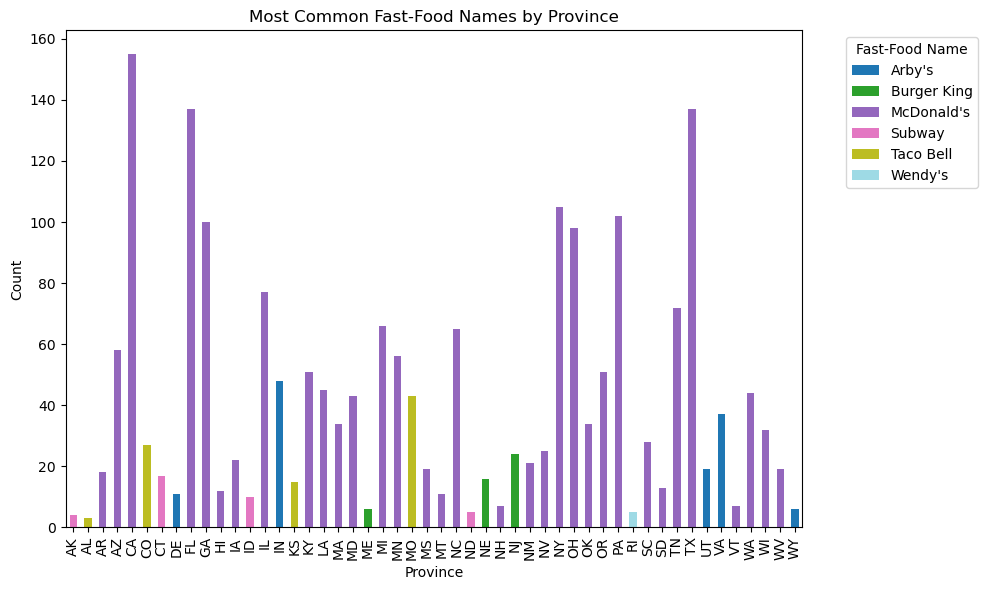

In [17]:
#Visualize the resulr


# Pivot the data to create a DataFrame suitable for plotting a stacked bar chart
pivot_df = most_common_names.pivot(index='province', columns='name', values='count').fillna(0)

# Create a stacked bar chart
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')

# Set the plot title and axis labels
plt.title('Most Common Fast-Food Names by Province')
plt.xlabel('Province')
plt.ylabel('Count')

# Show the legend
plt.legend(title='Fast-Food Name', bbox_to_anchor=(1.05, 1), loc='upper left')


# Show the plot
plt.tight_layout()
plt.show()


#### The above result shows that McDonald is the most common fastfood in the US and it is common in the following province - CA, FL, GA, TX, NY, PA, IL

#### Analysing the area with least restaurant

C:\Users\pc\AppData\Local\Temp\ipykernel_29916\1507873896.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


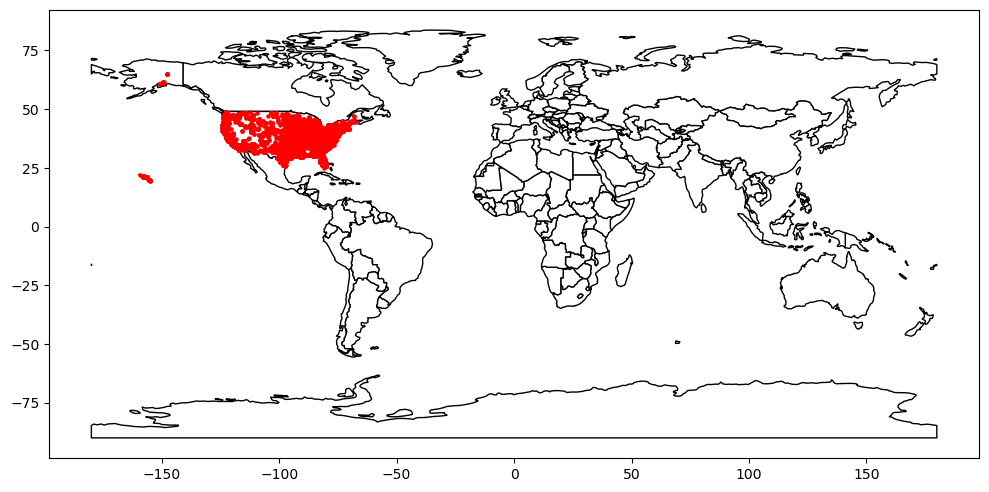

In [18]:


# Create a GeoDataFrame from the DataFrame with latitude and longitude information
gdf = gpd.GeoDataFrame(fastfood, geometry=gpd.points_from_xy(fastfood['longitude'], fastfood['latitude']))

# Create a map and plot the restaurants
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(12, 8), color='white', edgecolor='black')
gdf.plot(ax=ax, marker='o', color='red', markersize=5)
plt.show()


C:\Users\pc\AppData\Local\Temp\ipykernel_29916\143976917.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


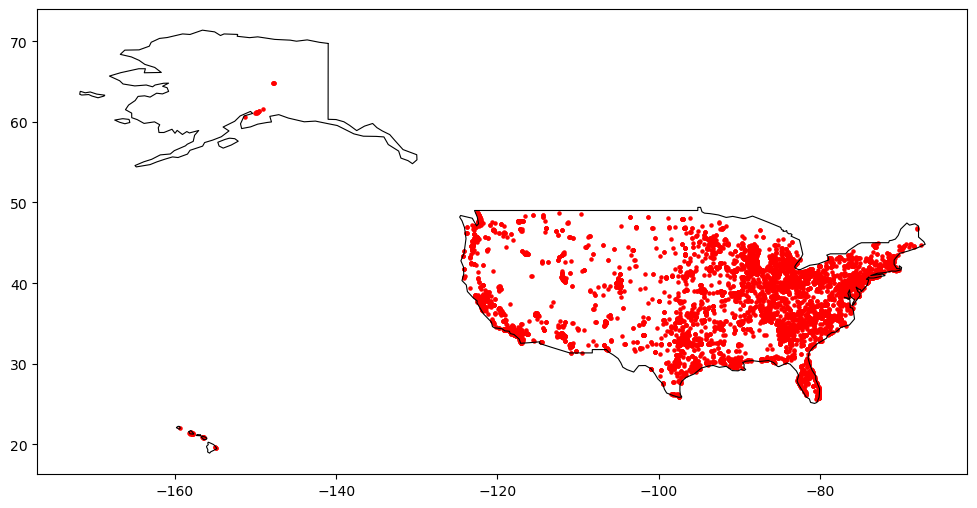

In [19]:

# Load the 'naturalearth_lowres' dataset directly from Geopandas datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the USA polygon using the ISO_A3 code
usa_map = world[world['iso_a3'] == 'USA']

# Create a GeoDataFrame from the DataFrame with latitude and longitude information
gdf = gpd.GeoDataFrame(fastfood, geometry=gpd.points_from_xy(fastfood['longitude'], fastfood['latitude']))

# Filter the GeoDataFrame to include only restaurants within the USA's boundaries
gdf = gdf[gdf.geometry.within(usa_map.unary_union)]

# Plot the USA map and the restaurants on it
fig, ax = plt.subplots(figsize=(12, 8))
usa_map.boundary.plot(ax=ax, linewidth=0.8, color='black')
gdf.plot(ax=ax, marker='o', color='red', markersize=5)
plt.show()
